## What are the questions we want answered?
+ How many nights had the same exact setlist?
+ How much did the encore change?
+ When were the most changes instituted?
+ How different was night one from the last night?
+ Longest night, shortest night (worth mentioning he loves to play abridged versions of his songs)
+ How does he compare to other indie artists?
    + Clairo
    + Mk.gee


Some direct comparisons:
+ Night one vs night two in Chicago for Dijon and Clairo (can we do a fun visualization for this?)
+ Mk.gee DNM count

Overall statistics:
+ Of our subset, what was the average "set-iness"?
+ Where did Dijon fall on the distribution?
+ Are there differences based on the popularity of an artist?

In [37]:
# import packages
import pandas as pd
import json
import numpy as np
import datetime
from matplotlib import pyplot as plt

In [38]:
# import data
setlist_data = pd.read_csv("../data/processed/analysis_dataset.csv")

## individual setlists for our three of greater interest
dijon = pd.read_csv("../data/processed/salt_shed_artists/dijon_setlists.csv")
clairo = pd.read_csv("../data/processed/salt_shed_artists/clairo_setlists.csv")
mk_gee = pd.read_csv("../data/processed/salt_shed_artists/mkgee_setlists.csv")

In [39]:
# some data cleaning
setlist_data["monthly_listen_group"] = pd.Categorical(setlist_data["monthly_listen_group"], ordered=True, categories=["Low", "Medium", "High", "Very high"])

## Set-iness

In [40]:
print("If we filter out those who are under 50 popularity score, we get mean set-iness of:",setlist_data[setlist_data["popularity"]>=50]["pct_setlist_songs"].mean())
print("If we don't filter, we get mean set-iness of:",setlist_data["pct_setlist_songs"].mean())

If we filter out those who are under 50 popularity score, we get mean set-iness of: 0.681347423355635
If we don't filter, we get mean set-iness of: 0.6550037524398025


In [41]:
print("If we filter out those who are under 50 popularity score, we get median set-iness of:",setlist_data[setlist_data["popularity"]>=50]["pct_setlist_songs"].median())
print("If we don't filter, we get median set-iness of:",setlist_data["pct_setlist_songs"].median())

If we filter out those who are under 50 popularity score, we get median set-iness of: 0.7565232261472862
If we don't filter, we get median set-iness of: 0.742917607633165


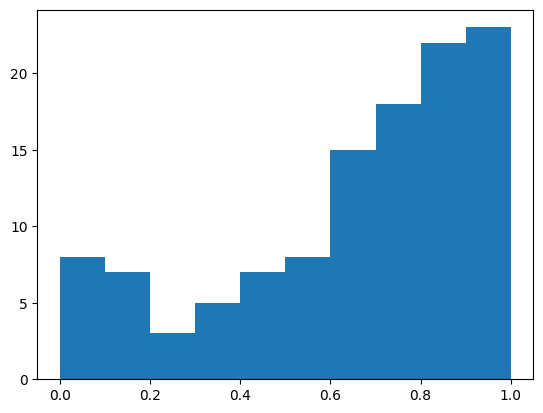

In [42]:
plt.hist(setlist_data["pct_setlist_songs"])
plt.show()

The distribution has weird outliers around 0 and definitely not a normal distribution.... I think it makes sense to use median.

In [43]:
setlist_data.groupby("monthly_listen_group", observed=True)["pct_setlist_songs"].agg(["median", "mean"])

,median,mean
monthly_listen_group,,
Low,0.594315,0.505844
Medium,0.729665,0.622572
High,0.741049,0.685906
Very high,0.861241,0.786282


In [44]:
setlist_data[setlist_data["monthly_listen_group"]=="High"]

,artist_mbid,artist_name,first_tour_date,pct_tour_songs,pct_setlist_songs,tour_date_num,avg_set_length,artist_id,popularity,monthly_listeners,followers,genres,total_albums,album_name,album_date,newest_release,monthly_listen_group,is_jam_band,is_salt_shed
8,955bc3c8-36d4-47e8-9648-f6728c613583,Marcus King,2024-04-06,0.017391,0.103040,45,19.466667,0FeWKiZSwBRdGzqeCdlH1a,62,3161631,380908,"['modern blues', 'blues rock']",6.0,Mood Swings,2024-04-05,1.0,High,False,True
12,8bff8d1d-2e87-4b97-9909-2bd3404e92b9,Lamp,2024-08-27,0.064516,0.151610,18,14.388889,0rFHElzeddB9ymDjgpBENX,63,1946461,1495962,"['shibuya-kei', 'japanese indie', 'city pop']",8.0,Dusk to Dawn,2023-10-10,322.0,High,False,True
21,1c3919b2-43ca-4a4a-935d-9d50135ec0ef,AFI,2025-09-14,0.086420,0.391717,25,17.480000,19I4tYiChJoxEO5EuviXpz,62,2372177,1011956,"['punk', 'horror punk', 'emo', 'skate punk']",17.0,Silver Bleeds the Black Sun...,2025-10-03,19.0,High,False,True
22,149e6720-4e4a-41a4-afca-6d29083fc091,Bad Religion,2024-04-06,0.204545,0.396782,29,22.448276,2yJwXpWAQOOl5XFzbCxLs9,62,1689007,1393225,"['punk', 'skate punk', 'hardcore punk', 'melod...",19.0,Age Of Unreason,2019-05-03,1800.0,High,False,True
23,98cb416e-5271-484c-ab3b-6bed6b4aae12,The Head and the Heart,2025-05-30,0.166667,0.429078,52,22.942308,0n94vC3S9c3mb2HyNAOcjg,64,3713886,1154748,"['indie folk', 'folk pop', 'folk']",9.0,Aperture,2025-05-09,21.0,High,False,True
26,607edb17-d439-48db-8482-da92167e4a59,Turnpike Troubadours,2025-07-11,0.209302,0.469150,33,19.848485,1YSA4byX5AL1zoTsSTlB03,66,2202854,654549,"['red dirt', 'texas country', 'alt country', '...",6.0,The Price of Admission,2025-04-11,91.0,High,False,True
28,59a7fbcb-ff74-494d-abd0-9c82359040c9,Grizzly Bear,2025-10-13,0.321429,0.498005,10,17.900000,2Jv5eshHtLycR6R8KQCdc4,55,1521982,862988,"['indie', 'baroque pop', 'indie rock']",11.0,Painted Ruins,2017-08-18,2978.0,High,False,True
31,2aab61bc-67f4-4722-8c6e-e1821b2e32a6,Violent Femmes,2025-10-04,0.297297,0.507115,11,21.181818,0rpMdBzQXf7aYRnu5fDBJy,57,1845709,843056,['folk punk'],11.0,Violent Femmes (Deluxe Edition),2023-12-01,673.0,High,False,True
33,dd569857-d15e-4dbe-baad-b46a5ffe34a0,Black Pumas,2024-01-18,0.310345,0.549054,32,16.312500,6eU0jV2eEZ8XTM7EmlguK6,64,4679625,1194572,['retro soul'],6.0,Chronicles of a Diamond,2023-10-27,83.0,High,False,True
36,5da8d9b1-af89-43a3-a519-8e32ec21e7f5,Durand Jones & The Indications,2025-09-10,0.343750,0.594236,14,18.214286,6TVVIyd0fsRDGg6WzHKyTP,64,3413519,505899,['retro soul'],5.0,Flowers,2025-06-27,75.0,High,False,True


In [45]:
setlist_data[setlist_data["monthly_listen_group"]=="Very high"]

,artist_mbid,artist_name,first_tour_date,pct_tour_songs,pct_setlist_songs,tour_date_num,avg_set_length,artist_id,popularity,monthly_listeners,followers,genres,total_albums,album_name,album_date,newest_release,monthly_listen_group,is_jam_band,is_salt_shed
16,606bf117-494f-4864-891f-09d63ff6aa4b,Rise Against,2024-07-20,0.102564,0.247972,29,16.137931,6Wr3hh341P84m3EI8qdn9O,71,6901072,2962615,"['punk', 'hardcore punk']",15.0,Ricochet,2025-08-15,391.0,Very high,False,True
25,3599a39e-4e10-4cb5-90d4-c8a015ebc73b,Portugal. The Man,2025-11-06,0.234043,0.464014,28,23.785714,4kI8Ie27vjvonwaB2ePh8T,71,12601252,1546519,[''],15.0,SHISH,2025-11-07,1.0,Very high,False,True
27,c3f28da8-662d-4f09-bdc7-3084bf685930,Iron & Wine,2024-07-08,0.285714,0.471983,16,21.062500,6mdiAmATAx73kdxrNrnlao,74,8277805,10496381,"['heavy metal', 'metal', 'hard rock', 'rock']",28.0,Senjutsu,2021-09-03,1039.0,Very high,False,True
39,cceea21d-f3ec-4586-be7a-d2e939c15c78,Dijon,2025-10-25,0.352941,0.620898,24,19.083333,0knGpCTbmG4ctl1wzYRZs4,69,5626297,552515,[''],2.0,Baby,2025-08-15,71.0,Very high,False,True
40,f23ef341-33bd-47c1-b83c-846a78581f05,PARTYNEXTDOOR,2024-06-19,0.483871,0.623669,10,23.900000,2HPaUgqeutzr3jx5a9WyDV,85,30041017,10548513,"['dark r&b', 'r&b', 'trap soul']",10.0,PARTYNEXTDOOR 4 (P4),2024-04-26,54.0,Very high,False,True
44,75a72702-a5ef-4513-bca5-c5b944903546,John Legend,2024-06-01,0.317073,0.651886,11,18.727273,5y2Xq6xcjJb2jVM54GHK3t,79,37823550,8197973,"['soft pop', 'neo soul']",18.0,My Favorite Dream,2024-08-30,90.0,Very high,False,True
45,b41b38d4-ef3e-4f37-8c75-cfe9af999696,Cage the Elephant,2025-08-01,0.478261,0.652740,32,18.125000,26T3LtbuGT1Fu9m0eRq5X3,74,12949154,4345963,[''],9.0,Neon Pill,2024-05-17,441.0,Very high,False,True
49,6bbb3983-ce8a-4971-96e0-7cae73268fc4,Jungle,2024-04-11,0.535714,0.692340,15,21.200000,59oA5WbbQvomJz2BuRG071,71,8476618,1767104,[''],4.0,Volcano,2023-08-11,244.0,Very high,False,True
50,fd87acc7-e0a0-4a45-bc2a-d2ab5c10be68,Fontaines D.C.,2024-09-24,0.520000,0.698726,18,18.555556,3SXwqSqAoBz9WCI9PDQzY6,73,6048262,1204844,['post-punk'],7.0,Romance,2024-08-23,32.0,Very high,False,True
68,e0e1a584-dd0a-4bd1-88d1-c4c62895039d,Foster the People,2025-01-25,0.551724,0.792657,28,20.035714,7gP3bB2nilZXLfPHJhMdvc,72,14999179,4063842,[''],5.0,Paradise State of Mind,2024-08-16,162.0,Very high,False,True


Any identical nights for Dijon?

In [47]:
dijon_sets = dijon.dropna().sort_values("songs").groupby(["id", "event_date", "city", "venue"], as_index=False)["songs"].agg(lambda x: ", ".join(x.astype(str)))

In [48]:
dijon_sets.groupby("songs").size().sort_values(ascending=False)

songs
"Nü Diamond, (Referee), Annie, Another Baby!, Automatic, Baby!, Big Mike’s, FIRE!, Good Luck, HIGHER!, Kindalove, Many Times, Nico’s Red Truck, Noah’s Highlight Reel, Rewind, Rodeo Clown, Scratching, TV Blues, The Dress, Yamaha, alley-oop, coogie, rock n roll    1
"Nü Diamond, (Referee), Annie, Another Baby!, Automatic, Baby!, Big Mike’s, FIRE!, HIGHER!, Many Times, Nico’s Red Truck, Rewind, Rodeo Clown, Skin, TV Blues, Talk Down, The Dress, Yamaha, coogie, rock n roll                                                       1
(Referee), Annie, Another Baby!, Automatic, Baby!, FIRE!, HIGHER!, Kindalove, Nico’s Red Truck, Rewind, Rodeo Clown, The Dress, Yamaha, alley-oop, coogie, rock n roll                                                                                                 1
(Referee), Annie, Another Baby!, Automatic, Baby!, FIRE!, HIGHER!, Kindalove, Many Times, Rewind, Rodeo Clown, Talk Down, The Dress, Yamaha, coogie, do you light up?, jesse, my man, rock n roll      

Not one setlist was the same! Even when eliminating positions.

## Visuals

In [8]:
def heatmap(df, cols=3):
    df["event_date"] =  pd.to_datetime(df["event_date"],format="%d-%m-%Y")
    max_month = df["event_date"].dt.month.max()
    if max_month in [4,6,9,11]:
        days=30
    elif (max_month == 2) & (df["event_date"].dt.year.max()%4==0):
        days=29
    elif (max_month == 2):
        days =28
    else:
        days = 31
    null_dates = pd.DataFrame({"event_date":pd.date_range(datetime.date(df["event_date"].dt.year.min(), df["event_date"].dt.month.min(), 1),
                                                    datetime.date(df["event_date"].dt.year.max(), df["event_date"].dt.month.max(), days),
                                                    freq="D"),
                            "notes":"No tour date"})
    heat_map = pd.concat([df[["event_date", "venue", "city", "base_song_pct"]],
                                null_dates]).drop_duplicates("event_date").sort_values("event_date")
    heat_map["dow"] = heat_map["event_date"].dt.dayofweek+2
    heat_map.loc[heat_map["dow"]==8, "dow"] = 1
    heat_map["month"] = heat_map["event_date"].dt.month
    heat_map["month_num"] = heat_map["month"].rank(method="dense")
    heat_map["row_position"] = np.ceil(heat_map["month_num"]/cols)
    heat_map["col_position"] = (heat_map["month_num"]-(heat_map["row_position"]-1)*cols)
    heat_map["diff"] = heat_map["event_date"].dt.day-heat_map["dow"]
    heat_map["row_offset"] = heat_map.groupby(["month_num"])["diff"].rank(method="dense")
    heat_map["x"] = heat_map["dow"]+((heat_map["col_position"]-1)*10)
    heat_map["y"] = -heat_map["row_offset"]-((heat_map["row_position"]-1)*10)
    heat_map["y_adj"] = heat_map["y"]-heat_map["y"].min()+1
    heat_map["pct_norm"] = 1
    heat_map.loc[heat_map["base_song_pct"].isna(),"pct_norm"] = 0
    heat_map.loc[heat_map["base_song_pct"]>heat_map["base_song_pct"].quantile(0.2),"pct_norm"] = 2
    heat_map.loc[heat_map["base_song_pct"]>heat_map["base_song_pct"].quantile(0.4),"pct_norm"] = 3
    heat_map.loc[heat_map["base_song_pct"]>heat_map["base_song_pct"].quantile(0.6),"pct_norm"] = 4
    heat_map.loc[heat_map["base_song_pct"]>heat_map["base_song_pct"].quantile(0.8),"pct_norm"] = 5
    return heat_map

In [9]:
dijon_heat_map = heatmap(dijon, cols=2)

In [18]:
clairo_heat_map = heatmap(clairo, cols=2)

In [19]:
clairo_heat_map.to_clipboard(index=False)

In [21]:
mk_gee_heat_map = heatmap(mk_gee, cols=2)

In [22]:
mk_gee_heat_map.to_clipboard(index=False)

In [12]:
chicago_slope_dijon = dijon[dijon["city"]=="Chicago"].copy().reset_index()
chicago_slope_dijon["rank"] = chicago_slope_dijon.groupby("id")["index"].rank(method="first")*-1
chicago_slope_dijon.loc[chicago_slope_dijon["id"]=="634c7ac3", "night"] = "12/7/2025"
chicago_slope_dijon.loc[chicago_slope_dijon["id"]=="1b4c6960", "night"] = "12/8/2025"
chicago_slope_dijon = pd.pivot(chicago_slope_dijon,
                                columns="songs",
                                index="night",
                                values="rank").reset_index()
chicago_slope_dijon.to_clipboard(index=False)

In [13]:
chicago_slope_clairo = clairo[clairo["city"]=="Chicago"].copy().reset_index()
chicago_slope_clairo["rank"] = chicago_slope_clairo.groupby("id")["index"].rank(method="first")*-1
chicago_slope_clairo.loc[chicago_slope_clairo["id"]=="4354333f", "night"] = "10/16/2024"
chicago_slope_clairo.loc[chicago_slope_clairo["id"]=="3b507cd8", "night"] = "10/17/2024"
chicago_slope_clairo = pd.pivot(chicago_slope_clairo,
                                columns="songs",
                                index="night",
                                values="rank").reset_index()
chicago_slope_clairo.to_clipboard(index=False)

In [14]:
# how many DNMs
mk_gee[mk_gee["songs"]=="DNM"].groupby(["id", "venue", "city", "event_date"], as_index=False).size().sort_values("size", ascending =False)

,id,venue,city,event_date,size
13,5b521f70,Uptown Theater,Minneapolis,05-10-2024,12
19,b53c1ba,Marathon Music Works,Nashville,20-09-2024,8
11,53521f71,Vic Theatre,Chicago,03-10-2024,6
6,3b521c80,The Fillmore Silver Spring,Silver Spring,23-09-2024,5
1,2b521c86,Terminal 5,New York,25-09-2024,5
9,4b521f7a,Citizens House of Blues Boston,Boston,26-09-2024,5
0,23521c87,Toad's Place,New Haven,24-09-2024,5
10,4b521f7e,History,Toronto,01-10-2024,5
2,2b521ca2,Tabernacle,Atlanta,18-09-2024,4
7,3b521cac,House of Blues,Dallas,15-09-2024,3
